#**Problem Statement**
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

#Objective:
To build a model to predict whether an individual is at risk of diabetes or not.


#DataSet Description:
* Pregnancies: Number of times pregnant

* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
*  BloodPressure: Diastolic blood pressure (mm Hg)

*  SkinThickness: Triceps skinfold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)




*   BMI: Body mass index (weight in kg/(height in m)^2)

*   Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
*   Age: Age in years

*   Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)








In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import _pickle
import missingno as msno
import plotly.express as px
import plotly.io as pio

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

import warnings 
warnings. filterwarnings("ignore")

#Importing the data set

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Target variable categorical
df.Outcome.unique()

array([1, 0])

In [ ]:
# Check for null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here the actual shape of dataset


In [ ]:
df.shape

(768, 9)

“Outcome” is the feature I'm going to predict, 0 means No diabetes, 1 means diabetes. Of these 768 data points, 500 are labeled as 0 and 268 as 1.

In [ ]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


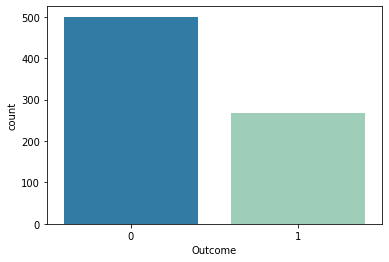

In [ ]:
sns.countplot(df['Outcome'],label="Count",palette='YlGnBu_r')

In [ ]:
# valueable information for data cleaning

for col in df.columns:
    print("{} minimum value is {}".format(col, df[col].min()))
    print("{} maximum value is {}".format(col, df[col].max()))
    print("{} mean value is {}".format(col, df[col].mean()))
    print("--"*22)

Pregnancies minimum value is 0
Pregnancies maximum value is 17
Pregnancies mean value is 3.8450520833333335
--------------------------------------------
Glucose minimum value is 0
Glucose maximum value is 199
Glucose mean value is 120.89453125
--------------------------------------------
BloodPressure minimum value is 0
BloodPressure maximum value is 122
BloodPressure mean value is 69.10546875
--------------------------------------------
SkinThickness minimum value is 0
SkinThickness maximum value is 99
SkinThickness mean value is 20.536458333333332
--------------------------------------------
Insulin minimum value is 0
Insulin maximum value is 846
Insulin mean value is 79.79947916666667
--------------------------------------------
BMI minimum value is 0.0
BMI maximum value is 67.1
BMI mean value is 31.992578124999977
--------------------------------------------
DiabetesPedigreeFunction minimum value is 0.078
DiabetesPedigreeFunction maximum value is 2.42
DiabetesPedigreeFunction mean 


On a high level we can see that there is no missing value presnet in the dataset. However, we can see that Glucose,BloodPressure,SkinThickness,Insulin,BMI has minimum value as 0 which does not make any sense. Hence, we can consider them as missing value replae with np.nan

In [ ]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

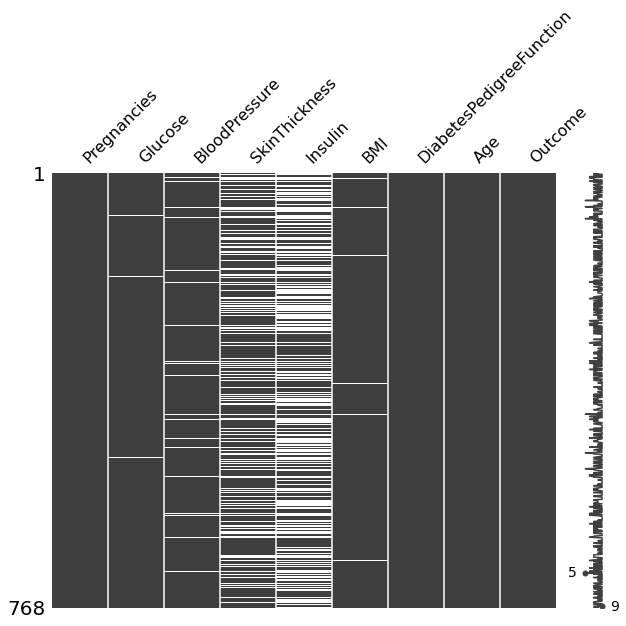

In [ ]:
msno.matrix(df,figsize=(10,8))
plt.show()

Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Outcome                      0.000000
Age                          0.000000
DiabetesPedigreeFunction     0.000000
Pregnancies                  0.000000
dtype: float64


<function matplotlib.pyplot.show>

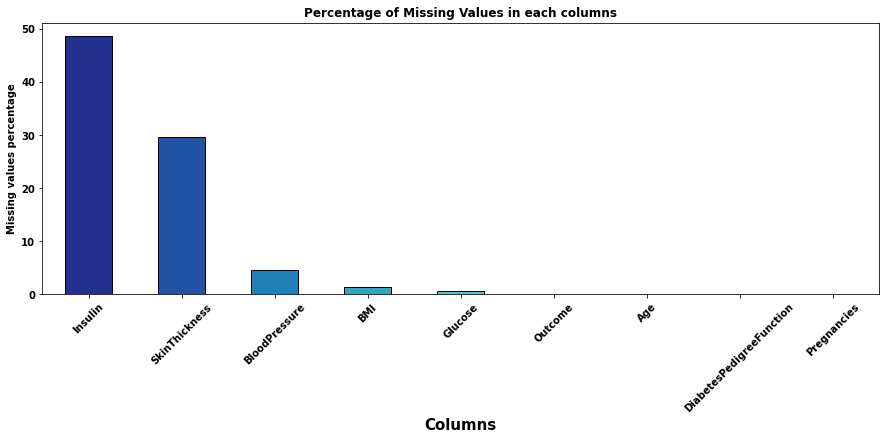

In [ ]:
# plotting the percentage of missing values on graph

plt.figure(figsize = (15, 5))
percentage = (df.isnull().mean()) * 100
percentage.sort_values(ascending = False).plot.bar(color = sns.color_palette("YlGnBu_r", 8), edgecolor= "black")
print(percentage.sort_values(ascending=False))
plt.xticks(rotation=45, weight = "bold")
plt.title("Percentage of Missing Values in each columns", weight= "bold")
plt.xlabel('Columns', size=15, weight="bold")
plt.ylabel('Missing values percentage', weight = "bold")
plt.yticks(weight ="bold")
plt.show

#Observations:

*   Here we can note that 48% of insulin data has null values followed by 29% null values of Skin Thinkness.
We will fix this later according to skewness of data.
* We will fix this later according to skewness of data



In [ ]:
ax= px.scatter(df,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="Age and glucose correlation")
ax.show()

In [ ]:
ax= px.scatter(df,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="Age and bloodpressure correlation")
ax.show()

In [ ]:
ax = px.scatter_3d(df, x="Age", y="Glucose", z="Insulin",template= "plotly_dark",color="Outcome")
ax.show()

In [ ]:
#Check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
df['Glucose_1']=df['Glucose'].fillna(df.Glucose.median())

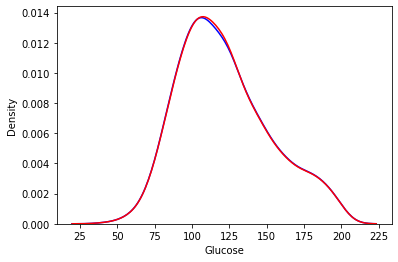

In [ ]:
sns.kdeplot(df['Glucose'], color='b', shade=False, Label='Glucose') 
sns.kdeplot(df['Glucose_1'], color='r', shade=False, Label='Glucose_1')


We can see that meadian imputation has done a great job. Hence we do not require any other approach for missing value imputation for Glucose

In [ ]:
df['Glucose']=df['Glucose_1']

**BloodPressure**

In [ ]:
df['BloodPressure_1']=df['BloodPressure'].fillna(df.BloodPressure.median())

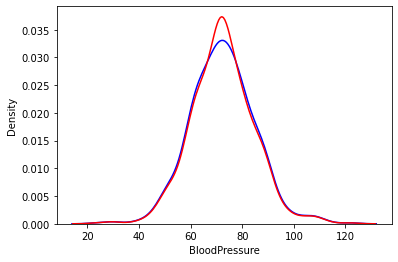

In [ ]:
sns.kdeplot(df['BloodPressure'], color='b', shade=False, Label='BloodPressure') 
sns.kdeplot(df['BloodPressure_1'], color='r', shade=False, Label='BloodPressure_1')

Here also we can see that median imputation working nicely and no need of other approach

In [ ]:
df['BloodPressure']=df['BloodPressure_1']


**SkinThickness |**

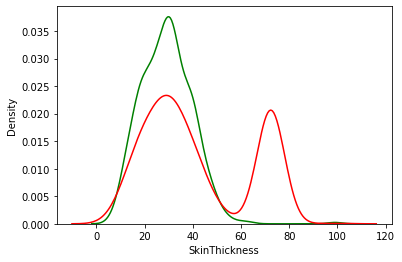

In [ ]:
df['SkinThickness_1']=df['SkinThickness'].fillna(df.BloodPressure.mean())
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['SkinThickness'], color='g', shade=False, Label='SkinThickness') 
sns.kdeplot(df['SkinThickness_1'], color='r', shade=False, Label='SkinThickness_1')

In [ ]:
df['SkinThickness'] = df['SkinThickness_1']


For skin thikness,most of the missing values are replaced with meadin which is near 30. Hence the pick of the new column had concentrated there. But we also have a spike near 70

**BMI**

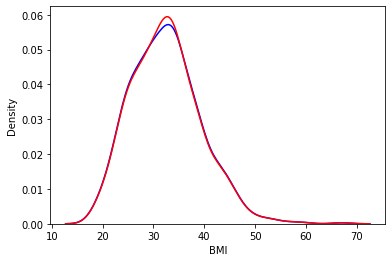

In [ ]:
df['BMI_1']=df['BMI'].fillna(df.BMI.median())
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['BMI'], color='b', shade=False, Label='BMI') 
sns.kdeplot(df['BMI_1'], color='r', shade=False, Label='BMI_1')

In [ ]:
df['BMI'] = df['BMI_1']

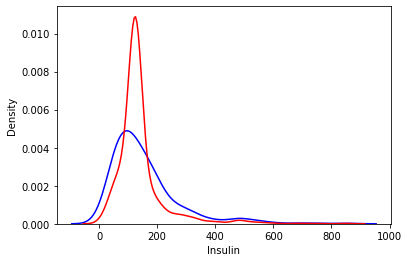

In [ ]:
df['Insulin_1']=df['Insulin'].fillna(df.Insulin.median())

# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['Insulin'], color='b', shade=False, Label='Insulin') 
sns.kdeplot(df['Insulin_1'], color='r', shade=False, Label='Insulin_1')

In [ ]:
df['Insulin'] = df['Insulin_1']

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose_1                   0
BloodPressure_1             0
SkinThickness_1             0
BMI_1                       0
Insulin_1                   0
dtype: int64

In [ ]:
df.drop(['Glucose_1','BloodPressure_1','SkinThickness_1','Insulin_1','BMI_1'],axis=1,inplace = True)

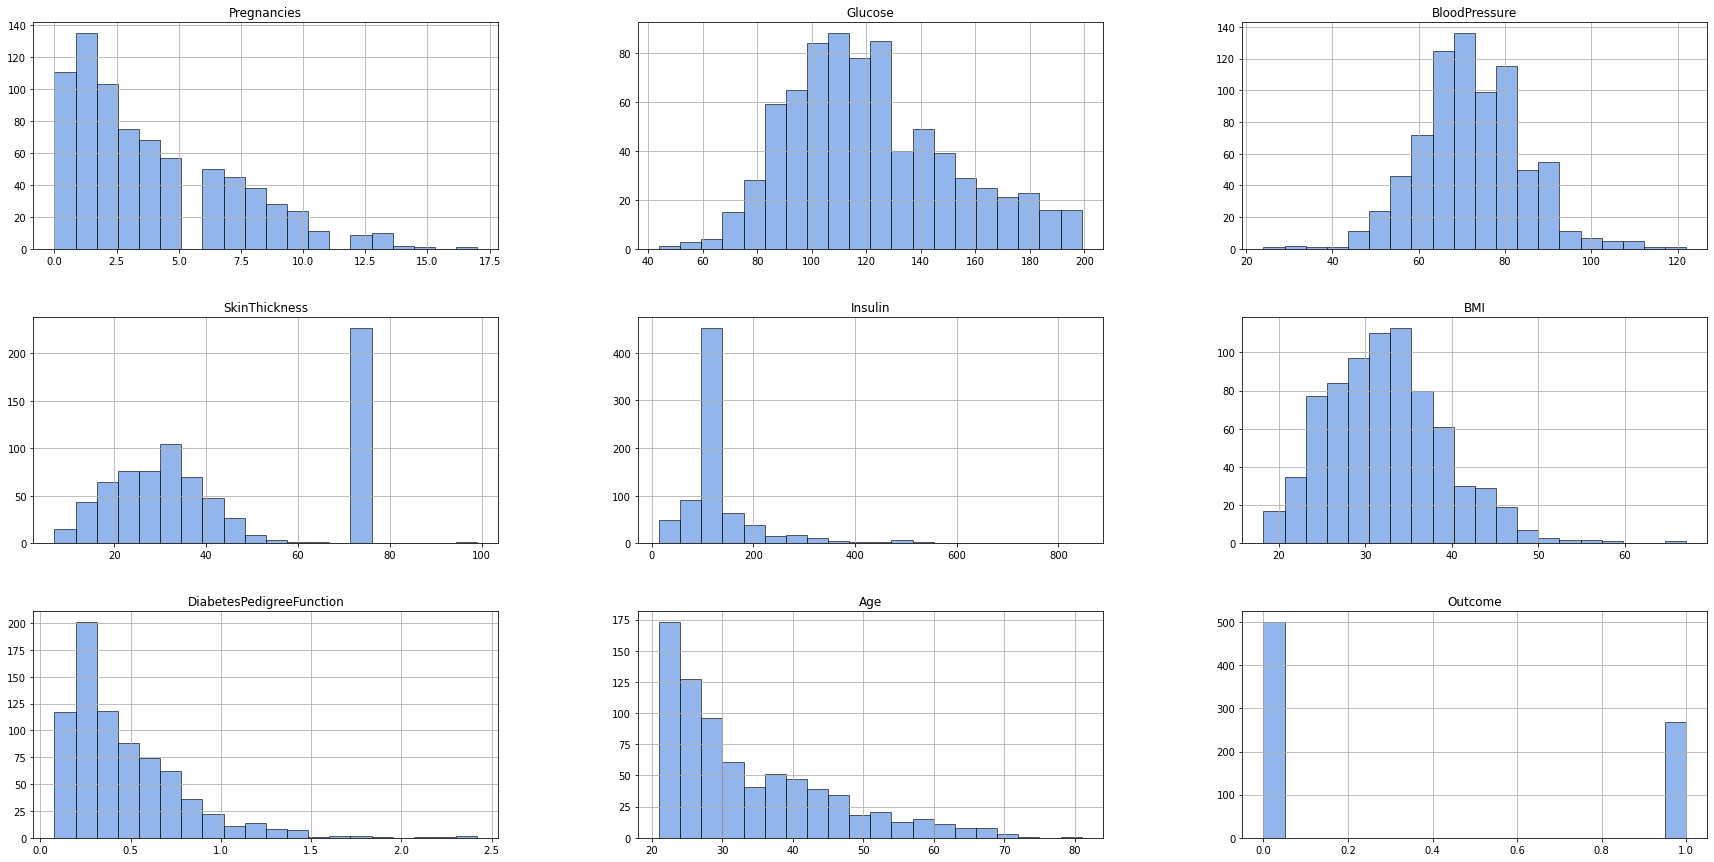

In [ ]:
#Data after all zeros replaced
df.hist(bins=20,figsize=(30,15),color='#4a84e0',edgecolor='k',alpha=0.6)
plt.show()

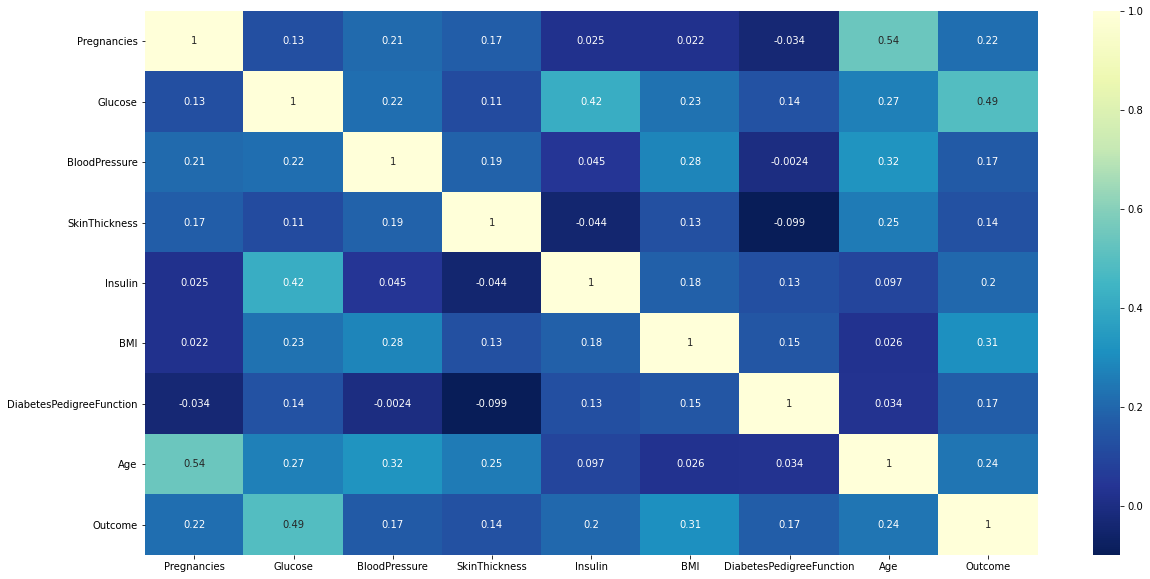

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu_r')

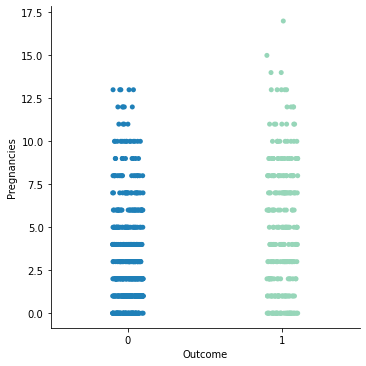

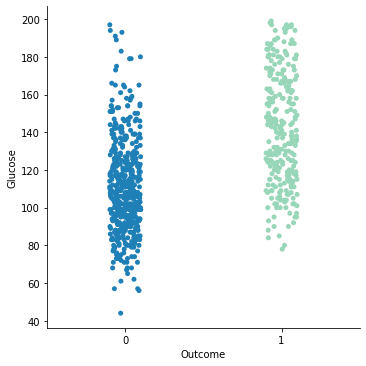

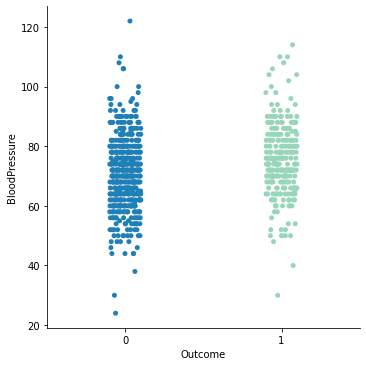

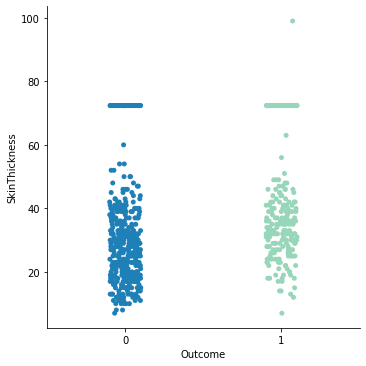

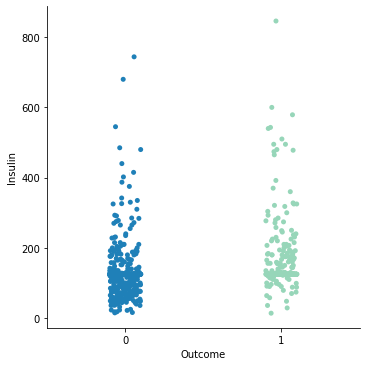

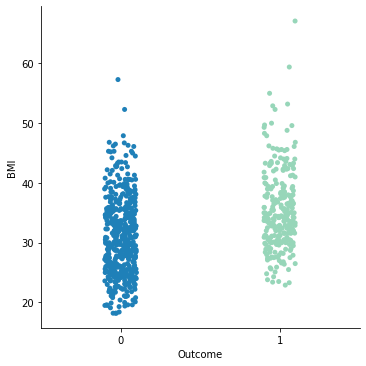

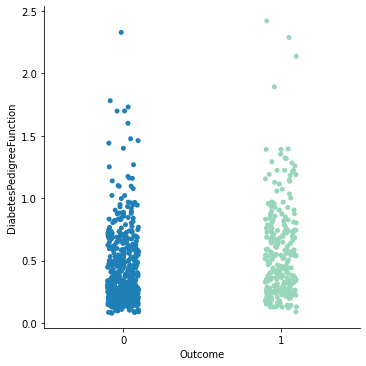

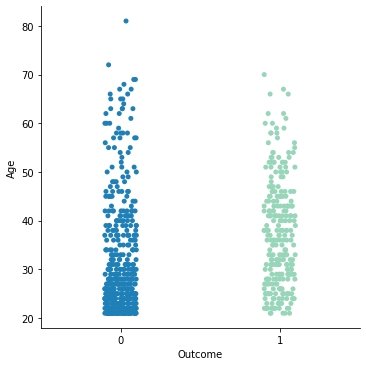

In [ ]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df,palette='YlGnBu_r')

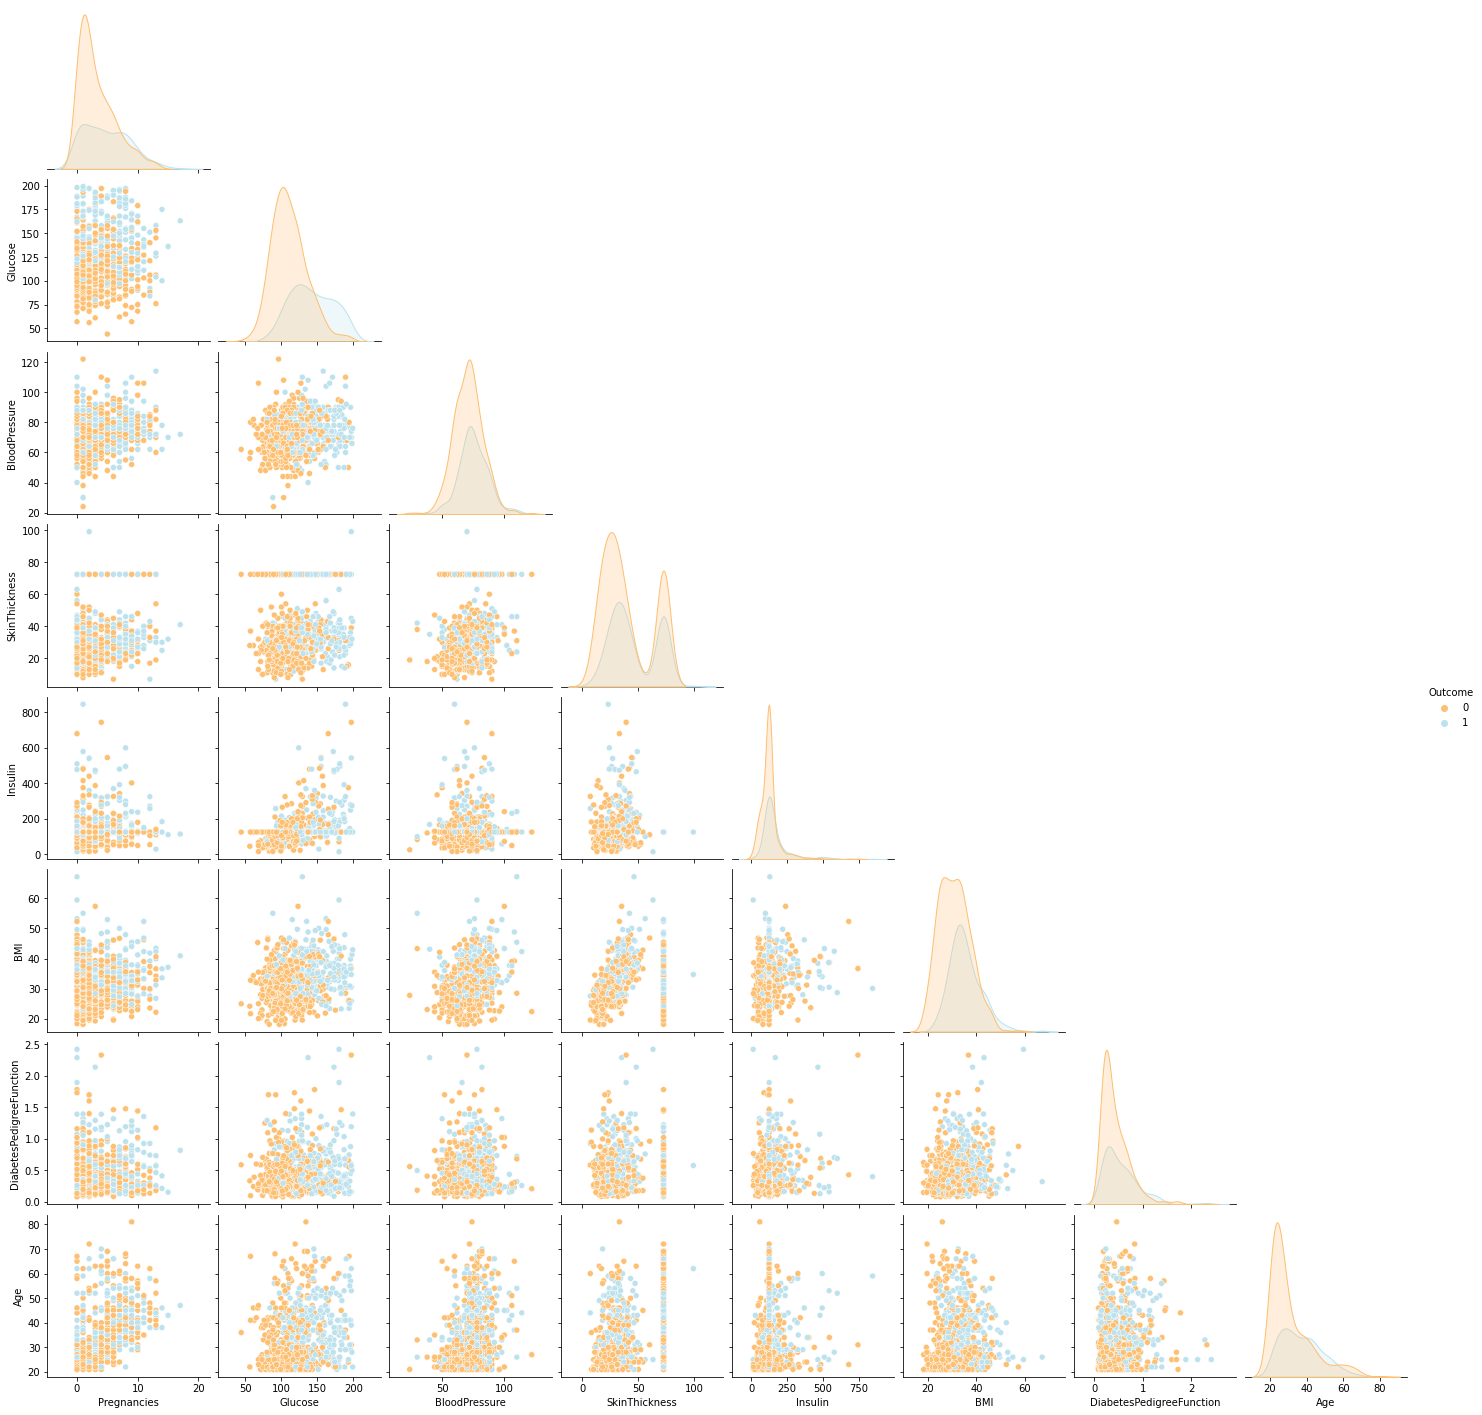

In [ ]:
sns.pairplot(df, hue="Outcome" ,corner=True,palette='RdYlBu')
plt.show()

Observations


*   Outcome variable class shows a moderate correlation with 'Glucose'.


*  There is a positive correlation between age and number of pregnancies which makes sense.
*   Insulin and skin thickness also shows a moderate positive correlation

*   We can see that most non-diabetic persons have glucose concentration<=100 and BMI<30

*   However, there are overlapping distributions for diabetic and non-diabetic persons. We should investigate it further.



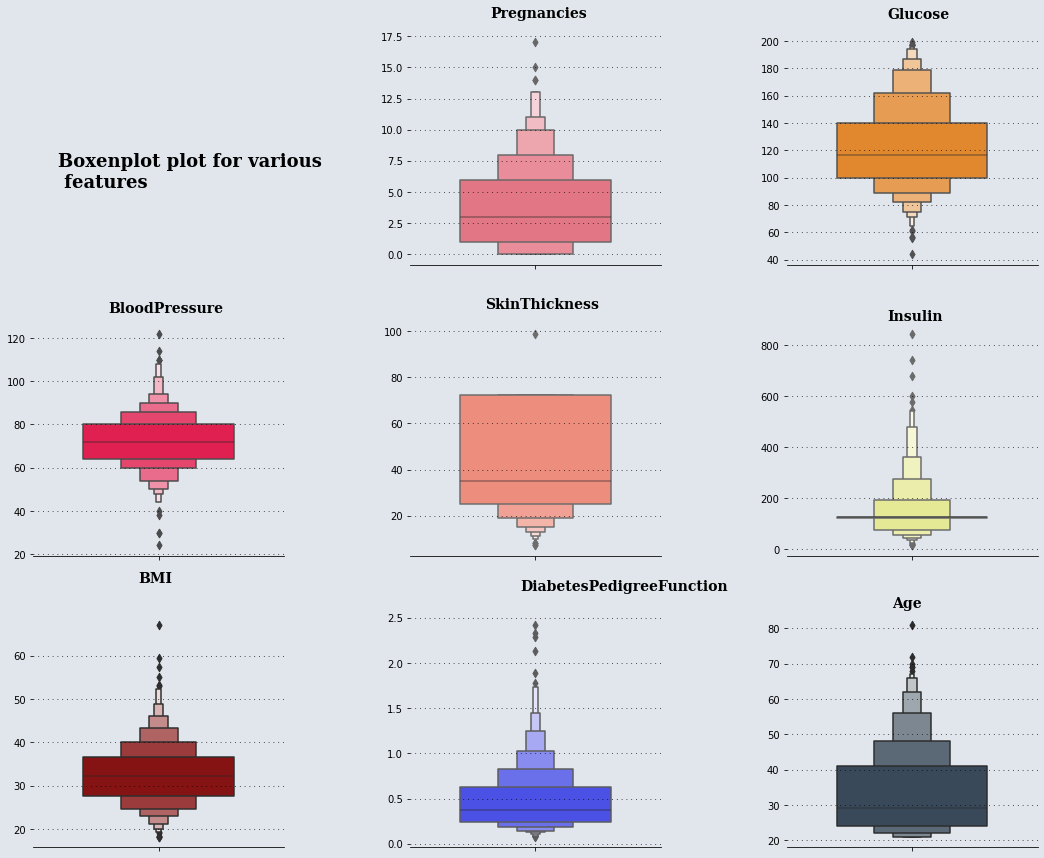

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#e1e6ed"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.10,0.4,
         'Boxenplot plot for various\n features',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DiabetiesPedigreeFunction
ax7.text(-0.060, 2.8,'DiabetesPedigreeFunction', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DiabetesPedigreeFunction'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

#Observation:


*   Number of pregnancies is right-skewed.The boxplot shows that there are few outliers to the right.

*   Insulin is right-skewed. There are some outliers to the right A 0 value in insulin is not possible. We should treat the 0 values as missing data.75% of women have less than 127 mu U/ml of insulin concentration and an average of 80 mu U/ml.

*   Plasma glucode is normally distrubted.0 value is an outlier for this variable.

*   There are one extreme value of 99 in Skin thickness, many value with 0 value of skin thicknessand we should treat the 0 values as missing dat

*   Age is right-skewed.There are outliers on higher end.
*   Diabetes pedigree function is skewed to the right and there are some outliers in this variable.


*   The distribution for blood pressure looks fairy normal except few outliers evident from the boxplot. We can see are some observations with 0 blood pressure but a 0 value of blood pressure is not possible and we should treat the 0 value as missing data.Most of the women have normal blood pressure.


*  BMI is normally distributed with the mean and median of approximately 32.There are some outliers in this variable. A 0 value in mass is not possible we should treat the 0 values as missing data.



#MODEL BUILDING

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome'] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (537, 8)
Number transactions y_train dataset:  (537,)
Number transactions X_test dataset:  (231, 8)
Number transactions y_test dataset:  (231,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SMOTE
I observed that there is more data that has Outcome 0. This may lead our models predicting more of people not having Diabetes. So I use SMOTE. SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)
X_train,y_train = os.fit_resample(X_train, y_train.ravel())

In [ ]:
X_train.shape,X_test.shape

((708, 8), (231, 8))

In [ ]:
'''def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(10,8))
    n_features =8
    plt.barh(range(n_features), model.feature_importances_, align='center',cmap='sdfsd')
    plt.yticks(np.arange(n_features),df) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)'''

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()#(booster='gbtree',learning_rate = 0.01, max_depth = 5,n_estimators=180)'''
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

Confusion Matrix :- 
[[117  29]
 [ 13  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.80      0.85       146
           1       0.71      0.85      0.77        85

    accuracy                           0.82       231
   macro avg       0.81      0.82      0.81       231
weighted avg       0.83      0.82      0.82       231



In [ ]:
# Creating a pickle file for the classifier
import pickle
filename = 'diabetes-prediction-xgb-model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, svc_pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, svc_pred))

Confusion Matrix:
 [[119  27]
 [ 12  73]]


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       146
           1       0.73      0.86      0.79        85

    accuracy                           0.83       231
   macro avg       0.82      0.84      0.82       231
weighted avg       0.84      0.83      0.83       231



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, rfc_pred))

Confusion Matrix:
 [[120  26]
 [ 21  64]]


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       146
           1       0.71      0.75      0.73        85

    accuracy                           0.80       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.80      0.80       231



In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1,verbose =1,n_estimators=180)
bagging_classifier.fit(X_train,y_train)
bagg_model = bagging_classifier.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, bagg_model))
print('\n')
print('Classification Report:\n', classification_report(y_test, bagg_model))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confusion Matrix:
 [[122  24]
 [ 21  64]]


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       146
           1       0.73      0.75      0.74        85

    accuracy                           0.81       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)
log_pred = logmodel.predict(X_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, log_pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, log_pred))

Confusion Matrix:
 [[114  32]
 [ 19  66]]


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       146
           1       0.67      0.78      0.72        85

    accuracy                           0.78       231
   macro avg       0.77      0.78      0.77       231
weighted avg       0.79      0.78      0.78       231

